# Comparison of Hi-C experiments

## Comparison between replicates

### Load previous data

In [1]:
from pytadbit.mapping.analyze import eig_correlate_matrices, correlate_matrices, get_reproducibility
from pytadbit.parsers.hic_parser import load_hic_data_from_bam
from matplotlib import pyplot as plt

In [2]:
base_path = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.bam'
bias_path = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}_Vanilla_{2}kb.biases'

### Mouse B cell

We load the hic_data object from the BAM file

In [3]:
reso = 100000
cel1 = 'mouse_B'
cel2 = 'mouse_PSC'
rep1  = 'rep1'
rep2  = 'rep2'

In [4]:
hic_data1 = load_hic_data_from_bam(base_path.format(cel1, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep1, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel1, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep2, reso / 1000),
                                  ncpus=8)


  (Matrix size 27269x27269)                                                    [2018-10-20 12:28:54]

  - Parsing BAM (122 chunks)                                                   [2018-10-20 12:28:54]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-20 12:31:36]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122


  (Matrix size 27269x27269)                                                    [2018-10-20 12:37:40]

  - Parsing BAM (122 chunks)                                                   [2018-10-20 12:37:41]
     .......... .......... .......... .......... ..........    

We compare the interactions of the two Hi-C matrices at a given distance.

#### The Spearman rank correlation of the matrix diagonals

In the plot we represent the Spearman rank correlation of the diagonals of the matrices starting from the main diagonal until the diagonal at 10Mbp.

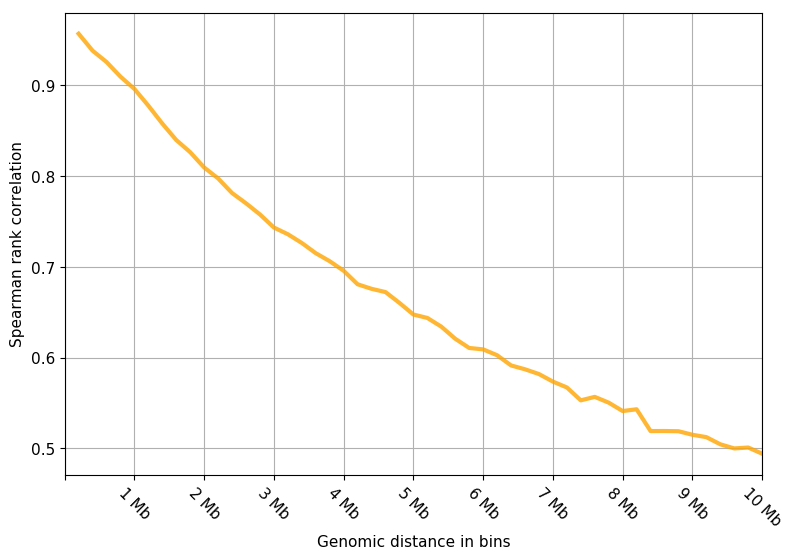

In [5]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

spearmans, dists, scc, std = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=True, axe=axe)

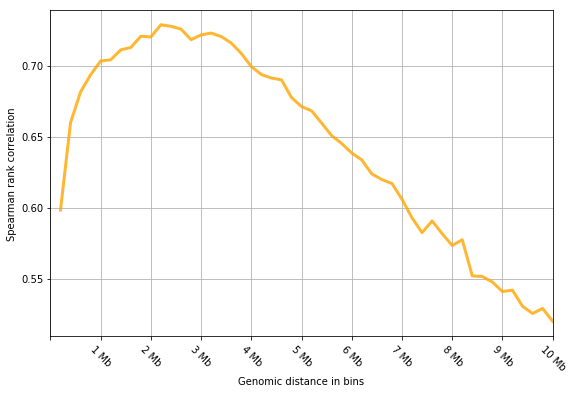

In [5]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

spearmans, dists, scc, std = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=True, axe=axe, normalized=True)

The SCC score as in HiCrep (see https://doi.org/10.1101/gr.220640.117) is also computed. The value of SCC ranges from −1 to 1 and can be interpreted in a way similar to the standard correlation

In [6]:
print 'SCC score: %.4f (+- %.7f)' % (scc, std)

SCC score: 0.5482 (+- 0.0075563)


In [23]:
reso = 1000000
hic_data1 = hic_data2 = None
hic_data1 = load_hic_data_from_bam(base_path.format(cel1, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep1, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel1, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep2, reso / 1000),
                                  ncpus=8)


  (Matrix size 2738x2738)                                                      [2018-10-04 12:00:32]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 12:00:32]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117

  - Getting matrices                                                           [2018-10-04 12:01:16]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117


  (Matrix size 2738x2738)                                                      [2018-10-04 12:01:57]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 12:01:57]
     .......... .......... .......... .......... ..........    

#### The correlation of the eigenvectors

Since the eigenvectors of a matrix capture its internal correlations [26], two matrices with highly correlation of eigenvectors are considered to have similar structure.

In this case we limit the computation to the first 6 eigenvectors

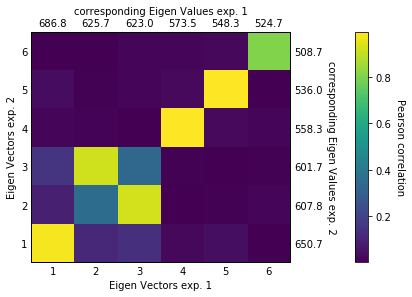

0.980 0.110 0.135 0.022 0.038 0.001

0.089 0.353 0.927 0.002 0.006 0.016

0.150 0.924 0.338 0.008 0.004 0.005

0.018 0.010 0.003 0.994 0.027 0.019

0.036 0.007 0.014 0.028 0.991 0.004

0.002 0.001 0.017 0.019 0.024 0.805



In [24]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

#### The reproducibility score (Q)

Computed as in HiC-spector (https://doi.org/10.1093/bioinformatics/btx152), it is also based on comparing eigenvectors. The reproducibility score ranges from 0 (low similarity) to 1 (identity).

In [25]:
reprod = get_reproducibility(hic_data1, hic_data2, num_evec=20, normalized=True, verbose=False)
print 'Reproducibility score: %.4f' % (reprod)

Reproducibility score: 0.8905


### Mouse iPS cell

We load the hic_data object from the BAM file

In [4]:
reso = 100000
hic_data1 = hic_data2 = None

In [5]:
hic_data1 = load_hic_data_from_bam(base_path.format(cel2, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep1, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep2, reso / 1000),
                                  ncpus=8)


  (Matrix size 27269x27269)                                                    [2018-10-04 12:28:39]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 12:28:39]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-04 12:29:45]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122


  (Matrix size 27269x27269)                                                    [2018-10-04 12:32:01]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 12:32:01]
     .......... .......... .......... .......... ..........    

We compare the interactions of the two Hi-C matrices at a given distance.

#### The Spearman rank correlation of the matrix diagonals

In the plot we represent the Spearman rank correlation of the diagonals of the matrices starting from the main diagonal until the diagonal at 10Mbp.

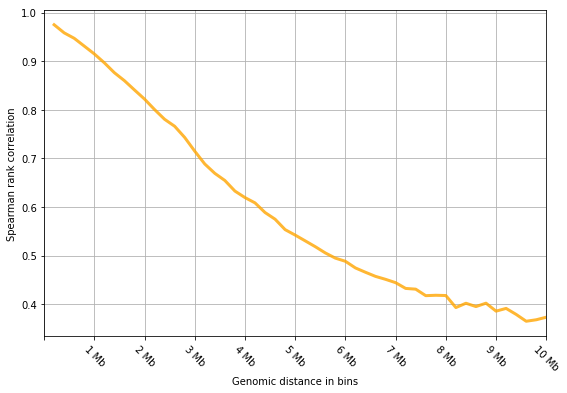

In [6]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

spearmans, dists, scc, std = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=True, axe=axe)

The SCC score as in HiCrep (see https://doi.org/10.1101/gr.220640.117) is also computed. The value of SCC ranges from −1 to 1 and can be interpreted in a way similar to the standard correlation

In [7]:
print 'SCC score: %.4f (+- %.7f)' % (scc, std)

SCC score: 0.6448 (+- 0.0277123)


In [8]:
reso = 1000000
hic_data1 = hic_data2 = None
hic_data1 = load_hic_data_from_bam(base_path.format(cel2, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep1, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep2, reso / 1000),
                                  ncpus=8)


  (Matrix size 2738x2738)                                                      [2018-10-04 12:37:58]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 12:37:58]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117

  - Getting matrices                                                           [2018-10-04 12:38:53]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117


  (Matrix size 2738x2738)                                                      [2018-10-04 12:39:36]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 12:39:37]
     .......... .......... .......... .......... ..........    

#### The correlation of the eigenvectors

Since the eigenvectors of a matrix capture its internal correlations [26], two matrices with highly correlation of eigenvectors are considered to have similar structure.

In this case we limit the computation to the first 6 eigenvectors

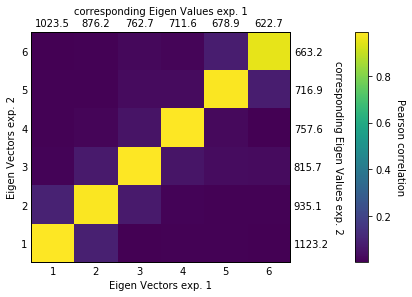

0.989 0.088 0.002 0.005 0.005 0.002

0.094 0.983 0.073 0.010 0.006 0.008

0.009 0.071 0.987 0.056 0.034 0.028

0.006 0.014 0.053 0.988 0.025 0.001

0.006 0.007 0.031 0.028 0.985 0.079

0.002 0.008 0.021 0.015 0.081 0.954



In [9]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

#### The reproducibility score (Q)

Computed as in HiC-spector (https://doi.org/10.1093/bioinformatics/btx152), it is also based on comparing eigenvectors. The reproducibility score ranges from 0 (low similarity) to 1 (identity).

In [10]:
reprod = get_reproducibility(hic_data1, hic_data2, num_evec=20, normalized=True, verbose=False)
print 'Reproducibility score: %.4f' % (reprod)

Reproducibility score: 0.5979


## Comparison between cell types

### Replicate 1

In [4]:
reso = 100000
hic_data1 = hic_data2 = None
hic_data1 = load_hic_data_from_bam(base_path.format(cel1, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep1, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep1, reso / 1000),
                                  ncpus=8)


  (Matrix size 27269x27269)                                                    [2018-10-04 13:10:53]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 13:10:53]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-04 13:12:37]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122


  (Matrix size 27269x27269)                                                    [2018-10-04 13:15:39]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 13:15:40]
     .......... .......... .......... .......... ..........    

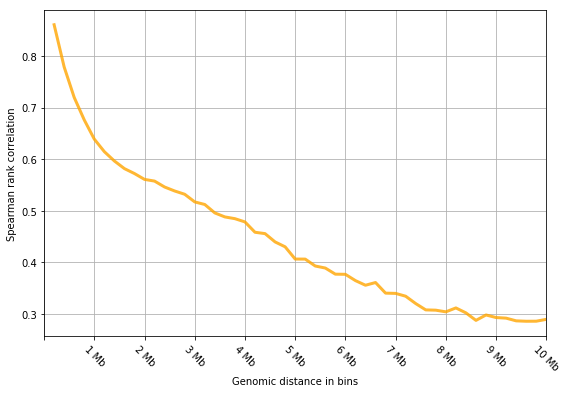

In [5]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

spearmans, dists, scc, std = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=True, axe=axe)

We expect a lower SCC score between different cell types

In [6]:
print 'SCC score: %.4f (+- %.7f)' % (scc, std)

SCC score: 0.4770 (+- 0.0197731)


In [5]:
reso = 1000000
hic_data1 = load_hic_data_from_bam(base_path.format(cel1, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep1, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2, rep1),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep1, reso / 1000),
                                  ncpus=8)


  (Matrix size 2738x2738)                                                      [2018-10-04 14:27:44]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 14:27:44]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117

  - Getting matrices                                                           [2018-10-04 14:28:52]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117


  (Matrix size 2738x2738)                                                      [2018-10-04 14:29:17]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 14:29:17]
     .......... .......... .......... .......... ..........    

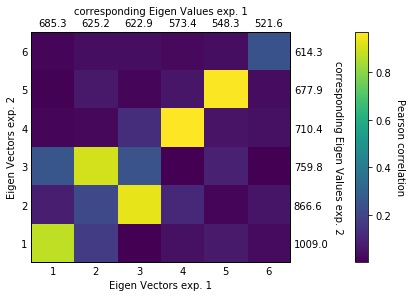

0.877 0.173 0.002 0.046 0.070 0.028

0.084 0.216 0.935 0.107 0.018 0.057

0.259 0.902 0.250 0.001 0.089 0.001

0.013 0.022 0.127 0.970 0.054 0.043

0.006 0.066 0.019 0.061 0.966 0.034

0.013 0.036 0.038 0.027 0.035 0.247



In [6]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

In [7]:
reprod = get_reproducibility(hic_data1, hic_data2, num_evec=20, normalized=True, verbose=False)
print 'Reproducibility score: %.4f' % (reprod)

Reproducibility score: 0.2641


### Replicate 2

In [8]:
reso = 100000
hic_data1 = hic_data2 = None
hic_data1 = load_hic_data_from_bam(base_path.format(cel1, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep2, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep2, reso / 1000),
                                  ncpus=8)


  (Matrix size 27269x27269)                                                    [2018-10-04 14:33:28]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 14:33:28]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-04 14:35:15]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122


  (Matrix size 27269x27269)                                                    [2018-10-04 14:38:29]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 14:38:29]
     .......... .......... .......... .......... ..........    

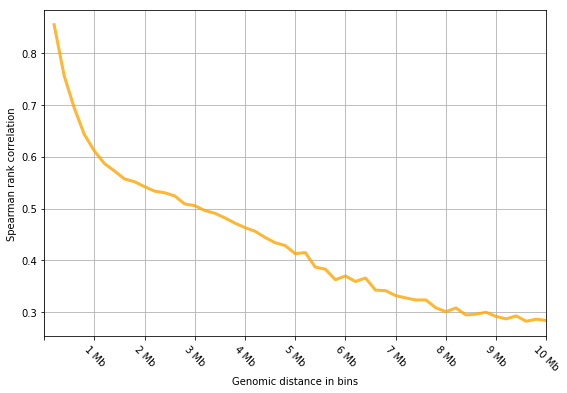

In [9]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

spearmans, dists, scc, std = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=True, axe=axe)

In [10]:
print 'SCC score: %.4f (+- %.7f)' % (scc, std)

SCC score: 0.4696 (+- 0.0185008)


In [11]:
reso = 1000000
hic_data1 = load_hic_data_from_bam(base_path.format(cel1, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel1, rep2, reso / 1000),
                                  ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2, rep2),
                                  resolution=reso,
                                  biases=bias_path.format(cel2, rep2, reso / 1000),
                                  ncpus=8)


  (Matrix size 2738x2738)                                                      [2018-10-04 14:42:54]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 14:42:55]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117

  - Getting matrices                                                           [2018-10-04 14:43:40]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117


  (Matrix size 2738x2738)                                                      [2018-10-04 14:44:29]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 14:44:30]
     .......... .......... .......... .......... ..........    

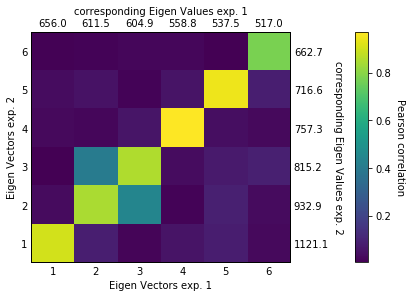

0.904 0.086 0.018 0.057 0.080 0.028

0.031 0.846 0.445 0.015 0.087 0.033

0.004 0.407 0.855 0.034 0.073 0.089

0.029 0.022 0.058 0.971 0.039 0.030

0.037 0.052 0.015 0.057 0.948 0.086

0.011 0.015 0.022 0.020 0.005 0.776



In [12]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto', normalized=True)

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

In [13]:
reprod = get_reproducibility(hic_data1, hic_data2, num_evec=20, normalized=True, verbose=False)
print 'Reproducibility score: %.4f' % (reprod)

Reproducibility score: 0.3852


## Merge Hi-C experiments

Once agreed that experiments are similar, they can be merged.

Here is a simple way to merge valid pairs. Arguably we may want to merge unfiltered data but the difference would be minimal specially with non-replicates.

In [ ]:
from pytadbit.mapping import merge_bams

In [ ]:
! mkdir -p results/fragment/mouse_B_both/
! mkdir -p results/fragment/mouse_PSC_both/
! mkdir -p results/fragment/mouse_B_both/03_filtering/
! mkdir -p results/fragment/mouse_PSC_both/03_filtering/

In [ ]:
cell = 'mouse_B'
rep1 = 'rep1'
rep2 = 'rep2'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.bam'.format(cell, rep1)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.bam'.format(cell, rep2)
hic_data  = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'.format(cell)

merge_bams(hic_data1, hic_data2, hic_data)

In [ ]:
cell = 'mouse_PSC'
rep1 = 'rep1'
rep2 = 'rep2'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.bam'.format(cell, rep1)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.bam'.format(cell, rep2)
hic_data  = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'.format(cell)

merge_bams(hic_data1, hic_data2, hic_data)

## Normalizing merged data

In [4]:
from pytadbit.mapping.analyze import hic_map

In [27]:
! mkdir -p results/fragment/both_mouse_B/04_normalizing
! mkdir -p results/fragment/both_mouse_PSC/04_normalizing

All in one loop to:
 - filter
 - normalize
 - generate intra-chromosome and genomic matrices

All datasets are analysed at various resolutions.

In [5]:
for cell in ['mouse_B','mouse_PSC']:
    print ' -', cell
    for reso in [1000000, 200000, 100000]:
        print '   *', reso
        # load hic_data
        hic_data = load_hic_data_from_bam(
            'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'.format(cell),
            reso)
        # filter columns
        hic_data.filter_columns(draw_hist=False, min_count=10, by_mean=True)
        # normalize
        hic_data.normalize_hic(iterations=0)
        # save biases to reconstruct normalization
        hic_data.save_biases('results/fragment/{0}_both/04_normalizing/biases_{0}_both_{1}kb.biases'.format(cell, reso / 1000))
        # save data as raw matrix per chromsome
        hic_map(hic_data, by_chrom='intra', normalized=False,
                savedata='results/fragment/{1}_both/04_normalizing/{0}_raw'.format(reso, cell))
        # save data as normalized matrix per chromosome
        hic_map(hic_data, by_chrom='intra', normalized=True,
                savedata='results/fragment/{1}_both/04_normalizing/{0}_norm'.format(reso, cell))
        # if the resolution is low save the full genomic matrix
        if reso > 500000:
            hic_map(hic_data, by_chrom=False, normalized=False, 
                    savefig ='results/fragment/{1}_both/04_normalizing/{0}_raw.png'.format(reso, cell),
                    savedata='results/fragment/{1}_both/04_normalizing/{0}_raw.mat'.format(reso, cell))

            hic_map(hic_data, by_chrom=False, normalized=True,
                    savefig ='results/fragment/{1}_both/04_normalizing/{0}_norm.png'.format(reso, cell) ,
                    savedata='results/fragment/{1}_both/04_normalizing/{0}_norm.mat'.format(reso, cell))

 - mouse_PSC
   * 1000000

  (Matrix size 2738x2738)                                                      [2018-10-04 16:50:56]

  - Parsing BAM (117 chunks)                                                   [2018-10-04 16:50:56]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117

  - Getting matrices                                                           [2018-10-04 16:53:28]
     .......... .......... .......... .......... ..........     50/117
     .......... .......... .......... .......... ..........    100/117
     .......... .......                                        117/117





     1     2     3   197   198   199   380   381   382   540   541   542   543   698   699   700   850   851   852  1000
  1001  1002  1146  1147  1148  1276  1277  1278  1401  1402  1403  1532  1533  1534  1654  1655  1656  1657  1776  1777
  1778  1897  1898  1899  2022  2023  2024  2126  2127  2128  2129  2226  2227  2228  2321  2322  2323  2412  2413  2414
  2474  2475  2476  2645  2694  2695  2697  2698  2708  2709  2711  2712  2737
/home/dcastillo/miniconda2/lib/python2.7/site-packages/pytadbit/utils/hic_filtering.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  round(root, 3), ' '.join(

     1     2     3    67    68    69   197   198   199   372   373   379   380   381   382   540   541   542   543   601
   602   670   671   689   690   691   698   699   700   792   850   851   852   994   996   997   999  1000  1001  1002
  1009  1020  1021  1022  1032  1146  1147  1148  1276  1277  1278  1401  1402  1403  1532  1533  1534  1602  1605  16

Found 202 of 2738 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2808.308
  - rescaling biases


/home/dcastillo/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


   * 200000

  (Matrix size 13641x13641)                                                    [2018-10-04 16:56:48]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 16:56:49]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-04 16:58:37]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122





     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15   112   113   114   960   978
   979   980   981   982   983   984   985   986   987   988   989   990   991   992   993  1855  1856  1857  1859  1861
  1890  1891  1892  1893  1894  1895  1896  1897  1898  1899  1900  1901  1902  1903  1904  2093  2437  2690  2691  2692
  2693  2694  2695  2696  2697  2698  2699  2700  2701  2702  2703  2704  2705  2901  2902  2903  2904  2996  2997  3190
  3299  3300  3302  3344  3345  3347  3401  3402  3403  3422  3473  3474  3475  3476  3477  3478  3479  3480  3481  3482
  3483  3484  3485  3486  3487  3488  3550  3551  3949  4131  4132  4133  4134  4135  4233  4234  4235  4236  4237  4238
  4239  4240  4241  4242  4243  4244  4245  4246  4247  4248  4851  4953  4954  4977  4980  4982  4983  4984  4985  4986
  4987  4988  4989  4990  4991  4992  4993  4994  4995  4996  4997  4998  5030  5031  5091  5092  5093  5147  5678  5710
  5711  5712  5713  5714  5715

Found 1180 of 13641 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13587.267
  - rescaling biases
   * 100000

  (Matrix size 27269x27269)                                                    [2018-10-04 17:04:51]

  - Parsing BAM (122 chunks)                                                   [2018-10-04 17:04:52]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-04 17:07:01]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122




     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20
    21    22    23    24    25    26    27    28    29    30   223   224   225   226   227   228   635  1783  1919  1920
  1921  1955  1956  1957  1958  1959  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973
  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  2865  3182  3708  3709  3710  3711  3712  3713
  3715  3716  3717  3719  3720  3721  3725  3777  3778  3779  3780  3781  3782  3783  3784  3785  3786  3787  3788  3789
  3790  3791  3792  3793  3794  3795  3796  3797  3798  3799  3800  3801  3802  3803  3804  3805  3806  3807  3935  3936
  4148  4149  4152  4184  4185  4186  4285  4286  4870  4871  4872  4873  4875  4912  5091  5092  5378  5379  5380  5381
  5382  5383  5384  5385  5386  5387  5388  5389  5390  5391  5392  5393  5394  5395  5396  5397  5398  5399  5400  5401
  5402  5403  5404  5405  5406


     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20
    21    22    23    24    25    26    27    28    29    30   223   224   225   226   227   228   608   610   611   618
   619   635   636   657   658   659   660   661   662   663   664   665   666   667   668   669   670   671   672   673
   674   675   676   677   678   679   680   681   682   683   684   685   686   687   688   689   690   691   692   785
   786   787   854   855  1306  1334  1335  1738  1739  1740  1783  1919  1920  1921  1955  1956  1957  1958  1959  1960
  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980
  1981  1982  1983  1984  1985  2859  2865  2961  2962  2986  2987  2988  2989  3182  3708  3709  3710  3711  3712  3713
  3714  3715  3716  3717  3718  3719  3720  3721  3722  3723  3724  3725  3732  3733  3776  3777  3778  3779  3780  3781
  3782  3783  3784  3785  3786 


Found 2722 of 27269 columns with poor signal
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 26205.477
  - rescaling biases
